In [1]:
from helium import *
import pandas as pd

In [2]:
url = "https://idtwi.com/"

In [3]:
driver = start_chrome(url)

In [4]:
driver.implicitly_wait(1)

In [5]:
user_name = "@F1Gate"
write(user_name,into="@twitter")

In [6]:
button = driver.find_element_by_tag_name("button")
button.click()

In [7]:
a = driver.find_elements_by_tag_name("a")

In [8]:
user_id = int(a[1].text.split(" ")[0])

In [9]:
driver.close()

In [10]:
CONSUMER_KEY = "GSqwcvv42kqYBxVEPTyONTd3c"
CONSUMER_SECLET = "lgQcF06jaLZs2YiUpDBHXSodE2leros03t5qSJzLoqNdRuC4DL"
ACCESS_TOKEN = "1318351090161754114-826FlEHp0q2KPvkgGvIehvtMx2kwlC"
ACCESS_TOKEN_SECRET = "3ticj5K5nVnzEcX0F5K0SusQp3S6lyz2AaxcNRexMGVbC"

In [11]:
import json
from requests_oauthlib import OAuth1Session
import tweepy

In [12]:
def get_user_id(user_name):
    url = "https://idtwi.com/" 
    driver = start_chrome(url, headless=True)    
    write(user_name,into="@twitter")
    button = driver.find_element_by_tag_name("button")
    button.click()
    a = driver.find_elements_by_tag_name("a")
    user_id = a[1].text.split(" ")[0]
    driver.close()
    return user_id

In [13]:
Account = "@F1Gate"
get_user_id(Account)

'54764039'

In [14]:
def get_tweets(Account):
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECLET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    user_id = get_user_id(Account)
    tweets = api.user_timeline(user_id, count=100, page=1)
    return tweets


num = 1 

Account = "@F1Gate" 
tweets = get_tweets(Account)
tweets_contents = []
for tweet in tweets:
    content = tweet.text
    tweets_contents.append(content)

In [15]:
tweets_contents[0]

'キミ・ライコネン 「いい感じだけど、土曜日にどの位置にいるかが重要」 / アルファロメオ F1モナコGP 木曜フリー走行\n#F1jp | #F1 | #キミ・ライコネン | #アルファロメオ | #F1モナコGP 🇲🇨 https://t.co/nV2wfSCXr4'

In [18]:
!pip install Tweetl

In [20]:
import Tweetl

tweet_getter = Tweetl.GetTweet(
    CONSUMER_KEY, 
    CONSUMER_SECLET,
    ACCESS_TOKEN, 
    ACCESS_TOKEN_SECRET
)

df_target = tweet_getter.get_tweets_target("F1Gate", 100)
tweet_cleanser = Tweetl.CleansingTweets()
cols = ["text"]
df_clean = tweet_cleanser.cleansing_df(df_target, subset_cols=cols)
df_clean.head()

,tweet_id,created_at,text,favorite_count,retweet_count
0,1395534899885625345,2021-05-21 00:20:22,キミ・ライコネン「いい感じだけど、土曜日にどの位置にいるかが重要」/アルファロメオf0モナコ...,10,1
1,1395524742396907524,2021-05-20 23:40:00,セバスチャン・ベッテル、フェルスタッペンへの助言を求められて自虐「僕はハミルトンに倒された身...,18,3
2,1395516022099226626,2021-05-20 23:05:21,【動画】0年f0モナコgpフリー走行0回目ハイライト| | | |,35,6
3,1395507684322029572,2021-05-20 22:32:13,マックス・フェルスタッペン「マシンががしっくり来ていない。遅すぎた」/レッドブル・ホンダf0...,30,3
4,1395504403583471619,2021-05-20 22:19:11,ミック・シューマッハ、ウォールに接触も「モナコでは仕方ないこと」/ハースf0モナコgp木曜フ...,22,2


In [22]:
type(df_clean.text[0])

str

In [23]:
def get_tweets_cranging(Account, num=100):
    tweet_getter = Tweetl.GetTweet(
        CONSUMER_KEY, 
        CONSUMER_SECLET,
        ACCESS_TOKEN, 
        ACCESS_TOKEN_SECRET
    )
    df_target = tweet_getter.get_tweets_target(Account, num)
    tweet_cleanser = Tweetl.CleansingTweets()
    cols = ["text"]
    df_clean = tweet_cleanser.cleansing_df(df_target, subset_cols=cols)
    return df_clean

In [59]:
Account = "MeijiCoLtd"
df = get_tweets_cranging(Account)

In [60]:
df.head(2)

,tweet_id,created_at,text,favorite_count,retweet_count
0,1395318421210861572,2021-05-20 10:00:10,/意外なおいしさ! ×＼甘さとしょっぱさがマッチしてオススメの「きのこの山×明治北海道十勝ス...,240,77
1,1395288181604446213,2021-05-20 08:00:00,今日のアイスはオリゴスマートの抹茶甘さ控えめな味わい,0,12


In [61]:
type(df)

pandas.core.frame.DataFrame

In [62]:
contents = []

for i in range(len(df)):
    content = df["text"][i].replace("|", "").replace("/", "").replace(" ", "")
    contents.append(content)

'意外なおいしさ!×＼甘さとしょっぱさがマッチしてオススメの「きのこの山×明治北海道十勝スマートチーズ」。スマートチーズの塩味が和らぎ甘味が増して、マイルドに感じられますよ一見驚きのメニューですが、ぜ…'

In [66]:
tweet_texts = "".join(contents)

In [67]:
tweet_texts

'意外なおいしさ!×＼甘さとしょっぱさがマッチしてオススメの「きのこの山×明治北海道十勝スマートチーズ」。スマートチーズの塩味が和らぎ甘味が増して、マイルドに感じられますよ一見驚きのメニューですが、ぜ…今日のアイスはオリゴスマートの抹茶甘さ控えめな味わい【00×コラボ企画】共働きでバタバタの平日を過ごしているみくりと平匡。ほっとできる日曜日の晩ごはんは、ささっと作れて美味しい料理がいい!先生描き下ろし完全オ…＼発売0周年特別企画00がとコラボ!先生描き下ろし完全オリジナルストーリーや料理研究家によるを公開中!その他のによるオリジナル…0月もシャキッと過ごしてほしい…そんな思いを持って明治の商品が立ち上がりました。バランスの取れた食事を取って、健康に過ごしましょう️村上茉愛選手、東京0オリンピック体操競技日本代表内定おめでとうございます!先日の第0回nhk杯体操において、素晴らしい演技で優勝し、代表内定となりました大会本番でも、村上選手のご活躍を祈念しています明治は東…最近はまってしまったチョコレート♡リピ買いしては毎日食べてる一箱があっという間になくなってしまう一個食べると止まらなくなるんだもん(&gt;_&lt;)…️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️️…懐かしくて買ってしまったw小学生の時、おばあちゃんによくアメリカに送ってもらったなぁ友達にあげると感動してたわ!…健康のための賢い食べ方がわかる!食の栄養バランスチェック＼毎月0日は️今日は0日の食事のバランスをチェックしてみませんか?こちらのサイトで食べたものを選んでいくと、栄養素の過不足が分かります\u200d️チョコレート効果cacao0%おやつ瓶に補充とてもうれしいお言葉をありがとうございます️「エッセル」というネーミングは、"エクセレント"と"エッセンシャル"からできた造語なんですこれからも、おいしくて高品質なアイスをお届けできるよう、がんばります…イラスト、すごくかわいいです確かにアポロの三角の形は傘にも見えますね️期間限定新発売!ホルン薫るコーヒーショコラサクッと口どけの良いラングドシャとふんわりとしたホイップショコラの組み合わせが人気の「ホルン」シリーズより、エチオピア産コーヒーの薫りが広がる新味登場!家事や勉強の休憩タイム…お弁当食べたあとにチ

In [68]:
import MeCab

In [69]:
mecab = MeCab.Tagger()

In [71]:
parts = mecab.parse(tweet_texts)

In [72]:
nouns = []
for part in parts.split("\n")[:-2]:
    if "名詞" in part.split("\t")[4]:
        nouns.append(part.split("\t")[0])

In [73]:
nouns

['さ',
 'さ',
 'さ',
 'マッチ',
 'きのこ',
 '山',
 '明治',
 '北海道',
 '十勝',
 'チーズ',
 'チーズ',
 '塩味',
 '甘味',
 '驚き',
 'メニュー',
 '今日',
 'アイス',
 'オリゴ',
 '抹茶',
 'さ',
 '味わい',
 '00',
 'コラボ',
 '企画',
 '共働き',
 '平日',
 'みくり',
 '平',
 '匡',
 '日曜',
 '日',
 '晩ごはん',
 '料理',
 '先生',
 '下ろし',
 '発売',
 '0',
 '周年',
 '企画',
 '00',
 'コラボ',
 '先生',
 '下ろし',
 'オリジナル',
 'ストーリー',
 '料理',
 '研究',
 '家',
 'よる',
 '公開',
 '中',
 '他',
 'オリジナル',
 '0',
 '月',
 '思い',
 '明治',
 '商品',
 'バランス',
 '食事',
 '健康',
 '村上',
 '茉愛',
 '選手',
 '東京',
 '0',
 'オリンピック',
 '体操',
 '競技',
 '日本',
 '代表',
 '内定',
 '先日',
 '0',
 '回',
 'nhk',
 '杯',
 '体操',
 '演技',
 '優勝',
 '代表',
 '内定',
 '大会',
 '本番',
 '村上',
 '選手',
 '活躍',
 '祈念',
 '明治',
 '東',
 '最近',
 'チョコレート',
 'リピ',
 '毎日',
 '一',
 '箱',
 '間',
 '一',
 '個',
 'もん',
 'gt',
 'lt',
 'w',
 '小学',
 '生',
 '時',
 'ばあ',
 'ちゃん',
 'アメリカ',
 '友達',
 '感動',
 '健康',
 'ため',
 '方',
 '食',
 '栄養',
 'バランス',
 'チェック',
 '毎月',
 '0',
 '日',
 '今日',
 '0',
 '日',
 '食事',
 'バランス',
 'チェック',
 'こちら',
 'サイト',
 'もの',
 '栄養',
 '素',
 '過不足',
 'チョコレート',
 '効果',
 'cacao',
 '0',
 'おやつ',
 '瓶',
 '補

In [75]:
words = " ".join(nouns)

In [88]:
def get_noun_words(Account, num=100):
    df = get_tweets_cranging(Account, num)
    contents = []
    for i in range(len(df)):
        content = df["text"][i].replace("|", "").replace("/", "").replace(" ", "")
        contents.append(content)
    tweet_texts = "".join(contents)
    mecab = MeCab.Tagger()    
    parts = mecab.parse(tweet_texts)
    nouns = []
    for part in parts.split("\n")[:-2]:
        if "名詞" in part.split("\t")[4]:
            nouns.append(part.split("\t")[0])
    words = " ".join(nouns)
    return  words

In [86]:
Account = "rikichannel1203"
words = get_noun_words(Account)

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
font_path = "./GenShinGothic-Monospace-Bold.ttf"

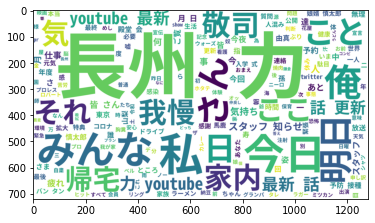

In [87]:
wc = WordCloud(width=1280, height=720, background_color="white", font_path=font_path)
wc.generate(words)
# wc.to_file("wc2.jpg")
plt.imshow(wc)